## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print('Libraries imported successfully!')

Libraries imported successfully!


## 2. Load and Inspect Dataset

In [3]:
# Load data
features = pd.read_csv('../data/features.csv')
targets = pd.read_csv('../data/targets.csv')

# Combine features and targets
data = pd.concat([features, targets], axis=1)

print('Dataset Shape:', data.shape)
print('\nFeatures Shape:', features.shape)
print('Targets Shape:', targets.shape)
print('\nColumn Names:')
print(data.columns.tolist())

Dataset Shape: (649, 33)

Features Shape: (649, 30)
Targets Shape: (649, 3)

Column Names:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [4]:
# Data types
print('\nData Types:')
print(data.dtypes)
print('\nData Info:')
print(data.info())


Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2 

In [5]:
# First few rows
print('\nFirst 5 Rows:')
data.head()


First 5 Rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 3. Data Summary Statistics

In [6]:
print('\nDescriptive Statistics for Numerical Columns:')
data.describe()


Descriptive Statistics for Numerical Columns:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
# Target variable statistics
print('\nTarget Variables Statistics:')
print(f"G1 (Period 1): Mean={targets['G1'].mean():.2f}, Std={targets['G1'].std():.2f}, Min={targets['G1'].min()}, Max={targets['G1'].max()}")
print(f"G2 (Period 2): Mean={targets['G2'].mean():.2f}, Std={targets['G2'].std():.2f}, Min={targets['G2'].min()}, Max={targets['G2'].max()}")
print(f"G3 (Final): Mean={targets['G3'].mean():.2f}, Std={targets['G3'].std():.2f}, Min={targets['G3'].min()}, Max={targets['G3'].max()}")


Target Variables Statistics:
G1 (Period 1): Mean=11.40, Std=2.75, Min=0, Max=19
G2 (Period 2): Mean=11.57, Std=2.91, Min=0, Max=19
G3 (Final): Mean=11.91, Std=3.23, Min=0, Max=19


## 4. Missing Values Analysis

In [8]:
# Check missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percent': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percent', ascending=False)

if len(missing_df) == 0:
    print('No missing values found! Dataset is complete.')
else:
    print('\nMissing Values:')
    print(missing_df)

No missing values found! Dataset is complete.


## 5. Target Variables Distribution

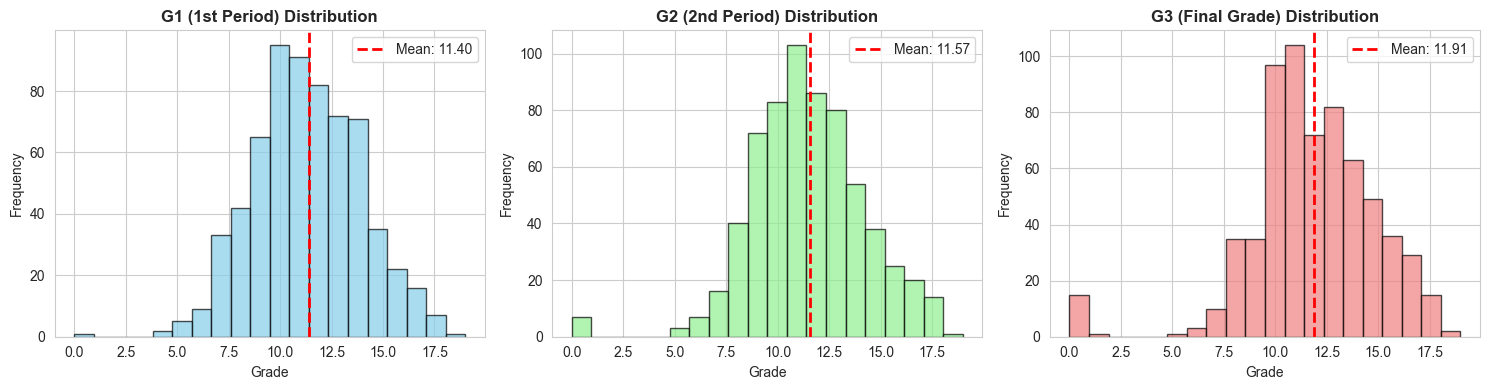

Target Variables Distributions:
G1: Skewness=-0.00, Kurtosis=0.04
G2: Skewness=-0.36, Kurtosis=1.66
G3: Skewness=-0.91, Kurtosis=2.71


In [9]:
# Create subplots for target distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# G1 Distribution
axes[0].hist(targets['G1'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('G1 (1st Period) Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Frequency')
axes[0].axvline(targets['G1'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {targets["G1"].mean():.2f}')
axes[0].legend()

# G2 Distribution
axes[1].hist(targets['G2'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_title('G2 (2nd Period) Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Frequency')
axes[1].axvline(targets['G2'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {targets["G2"].mean():.2f}')
axes[1].legend()

# G3 Distribution
axes[2].hist(targets['G3'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[2].set_title('G3 (Final Grade) Distribution', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Grade')
axes[2].set_ylabel('Frequency')
axes[2].axvline(targets['G3'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {targets["G3"].mean():.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

print('Target Variables Distributions:')
print(f'G1: Skewness={targets["G1"].skew():.2f}, Kurtosis={targets["G1"].kurtosis():.2f}')
print(f'G2: Skewness={targets["G2"].skew():.2f}, Kurtosis={targets["G2"].kurtosis():.2f}')
print(f'G3: Skewness={targets["G3"].skew():.2f}, Kurtosis={targets["G3"].kurtosis():.2f}')

## 6. Box Plots - Outlier Detection

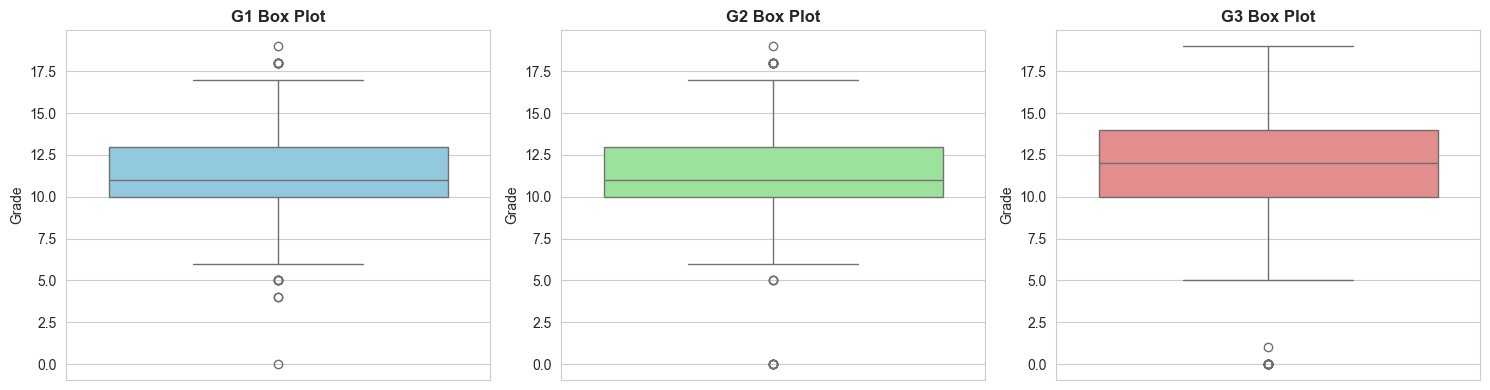

In [10]:
# Box plots for target variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(y=targets['G1'], ax=axes[0], color='skyblue')
axes[0].set_title('G1 Box Plot', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Grade')

sns.boxplot(y=targets['G2'], ax=axes[1], color='lightgreen')
axes[1].set_title('G2 Box Plot', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Grade')

sns.boxplot(y=targets['G3'], ax=axes[2], color='lightcoral')
axes[2].set_title('G3 Box Plot', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Grade')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis - Target Variables

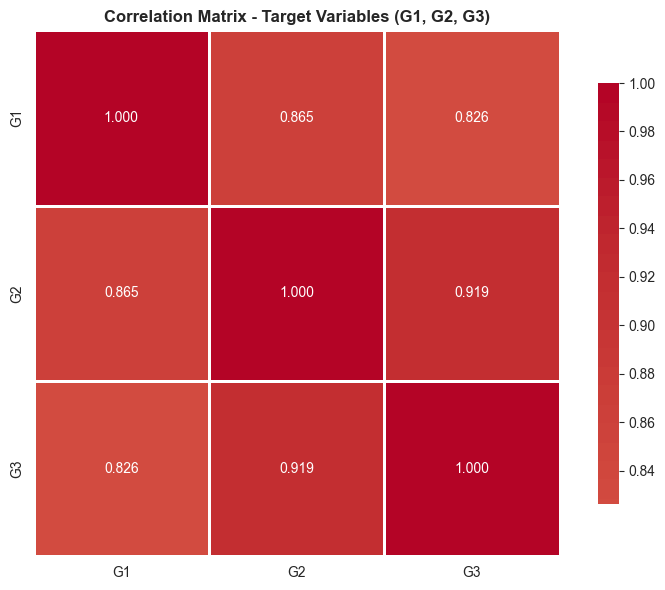


Correlation Matrix:
          G1        G2        G3
G1  1.000000  0.864982  0.826387
G2  0.864982  1.000000  0.918548
G3  0.826387  0.918548  1.000000


In [11]:
# Correlation between target variables
target_corr = targets.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Target Variables (G1, G2, G3)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nCorrelation Matrix:')
print(target_corr)

## 8. Relationships Between Grades

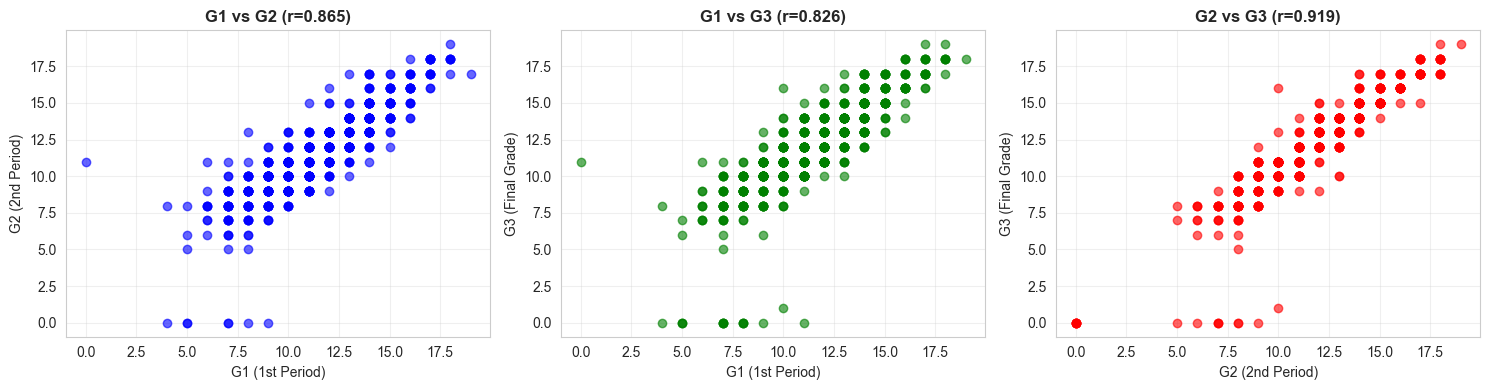

In [12]:
# Scatter plots - Grade relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# G1 vs G2
axes[0].scatter(targets['G1'], targets['G2'], alpha=0.6, color='blue')
axes[0].set_xlabel('G1 (1st Period)')
axes[0].set_ylabel('G2 (2nd Period)')
axes[0].set_title(f'G1 vs G2 (r={targets["G1"].corr(targets["G2"]):.3f})', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# G1 vs G3
axes[1].scatter(targets['G1'], targets['G3'], alpha=0.6, color='green')
axes[1].set_xlabel('G1 (1st Period)')
axes[1].set_ylabel('G3 (Final Grade)')
axes[1].set_title(f'G1 vs G3 (r={targets["G1"].corr(targets["G3"]):.3f})', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# G2 vs G3
axes[2].scatter(targets['G2'], targets['G3'], alpha=0.6, color='red')
axes[2].set_xlabel('G2 (2nd Period)')
axes[2].set_ylabel('G3 (Final Grade)')
axes[2].set_title(f'G2 vs G3 (r={targets["G2"].corr(targets["G3"]):.3f})', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Categorical Variables Distribution

Categorical Columns (17): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


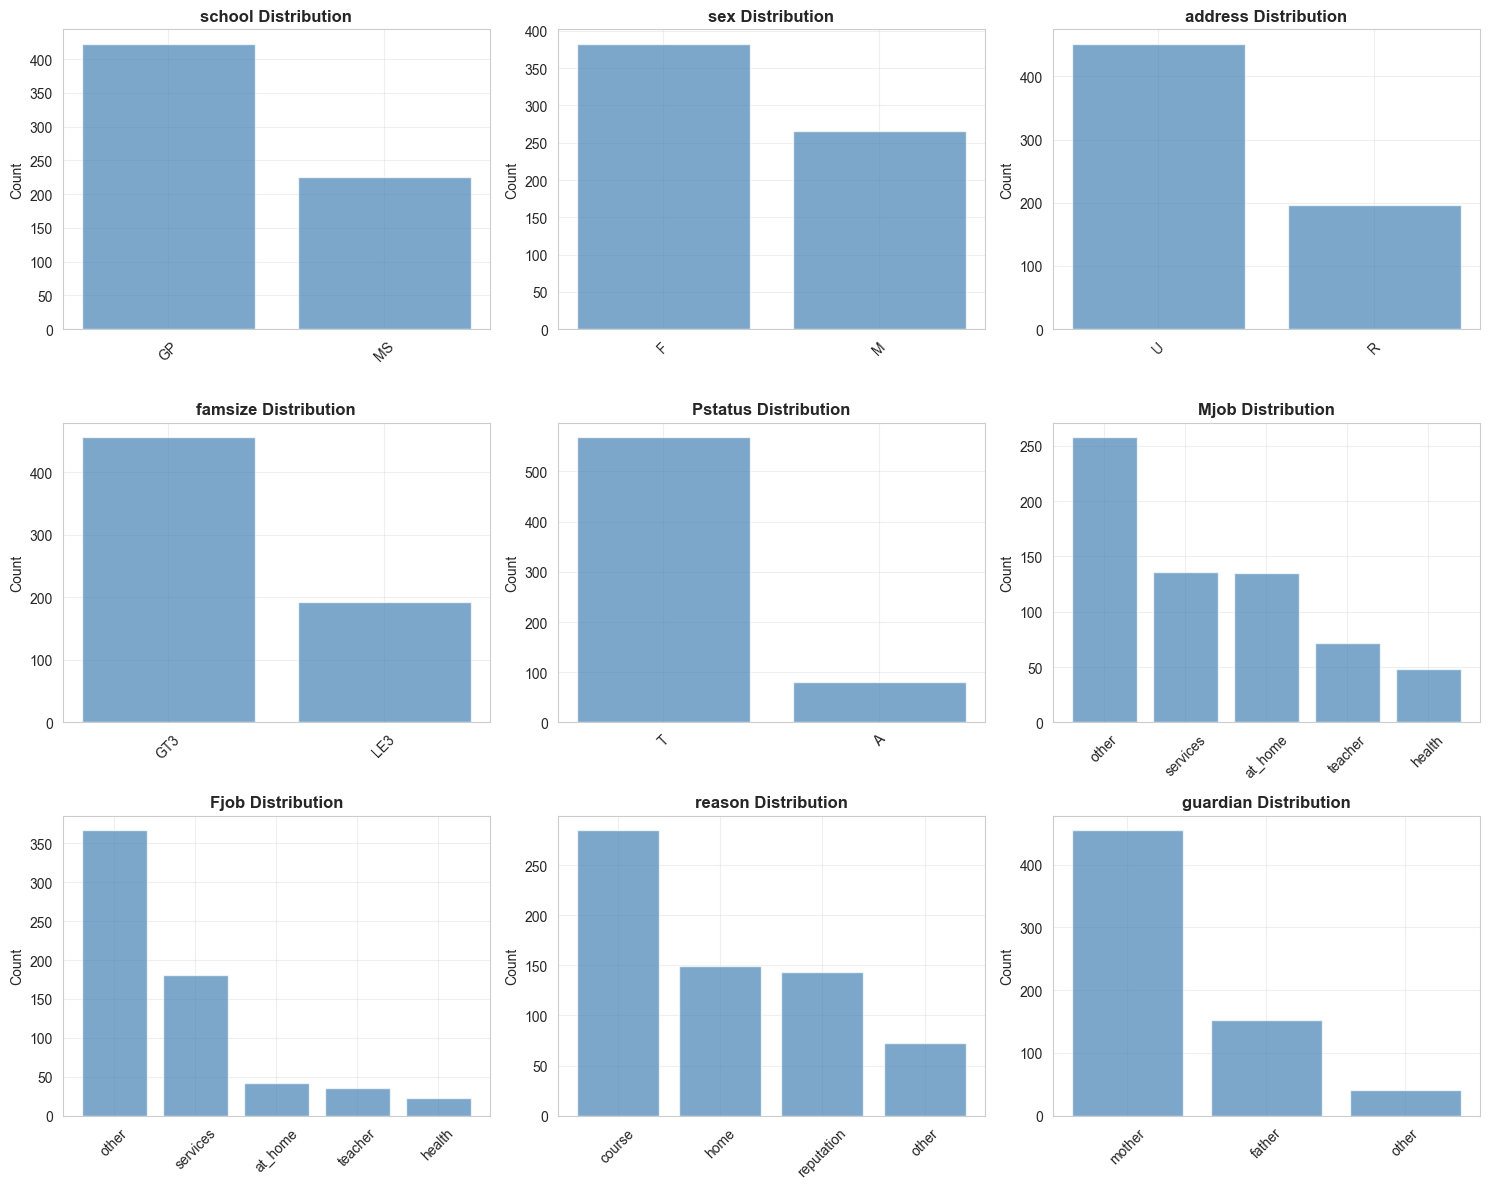

In [13]:
# Identify categorical columns
categorical_cols = features.select_dtypes(include='object').columns.tolist()

print(f'Categorical Columns ({len(categorical_cols)}): {categorical_cols}')

# Plot distribution of categorical variables
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:9]):
    value_counts = features[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45)
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Numerical Features Distribution

Numerical Columns (13): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


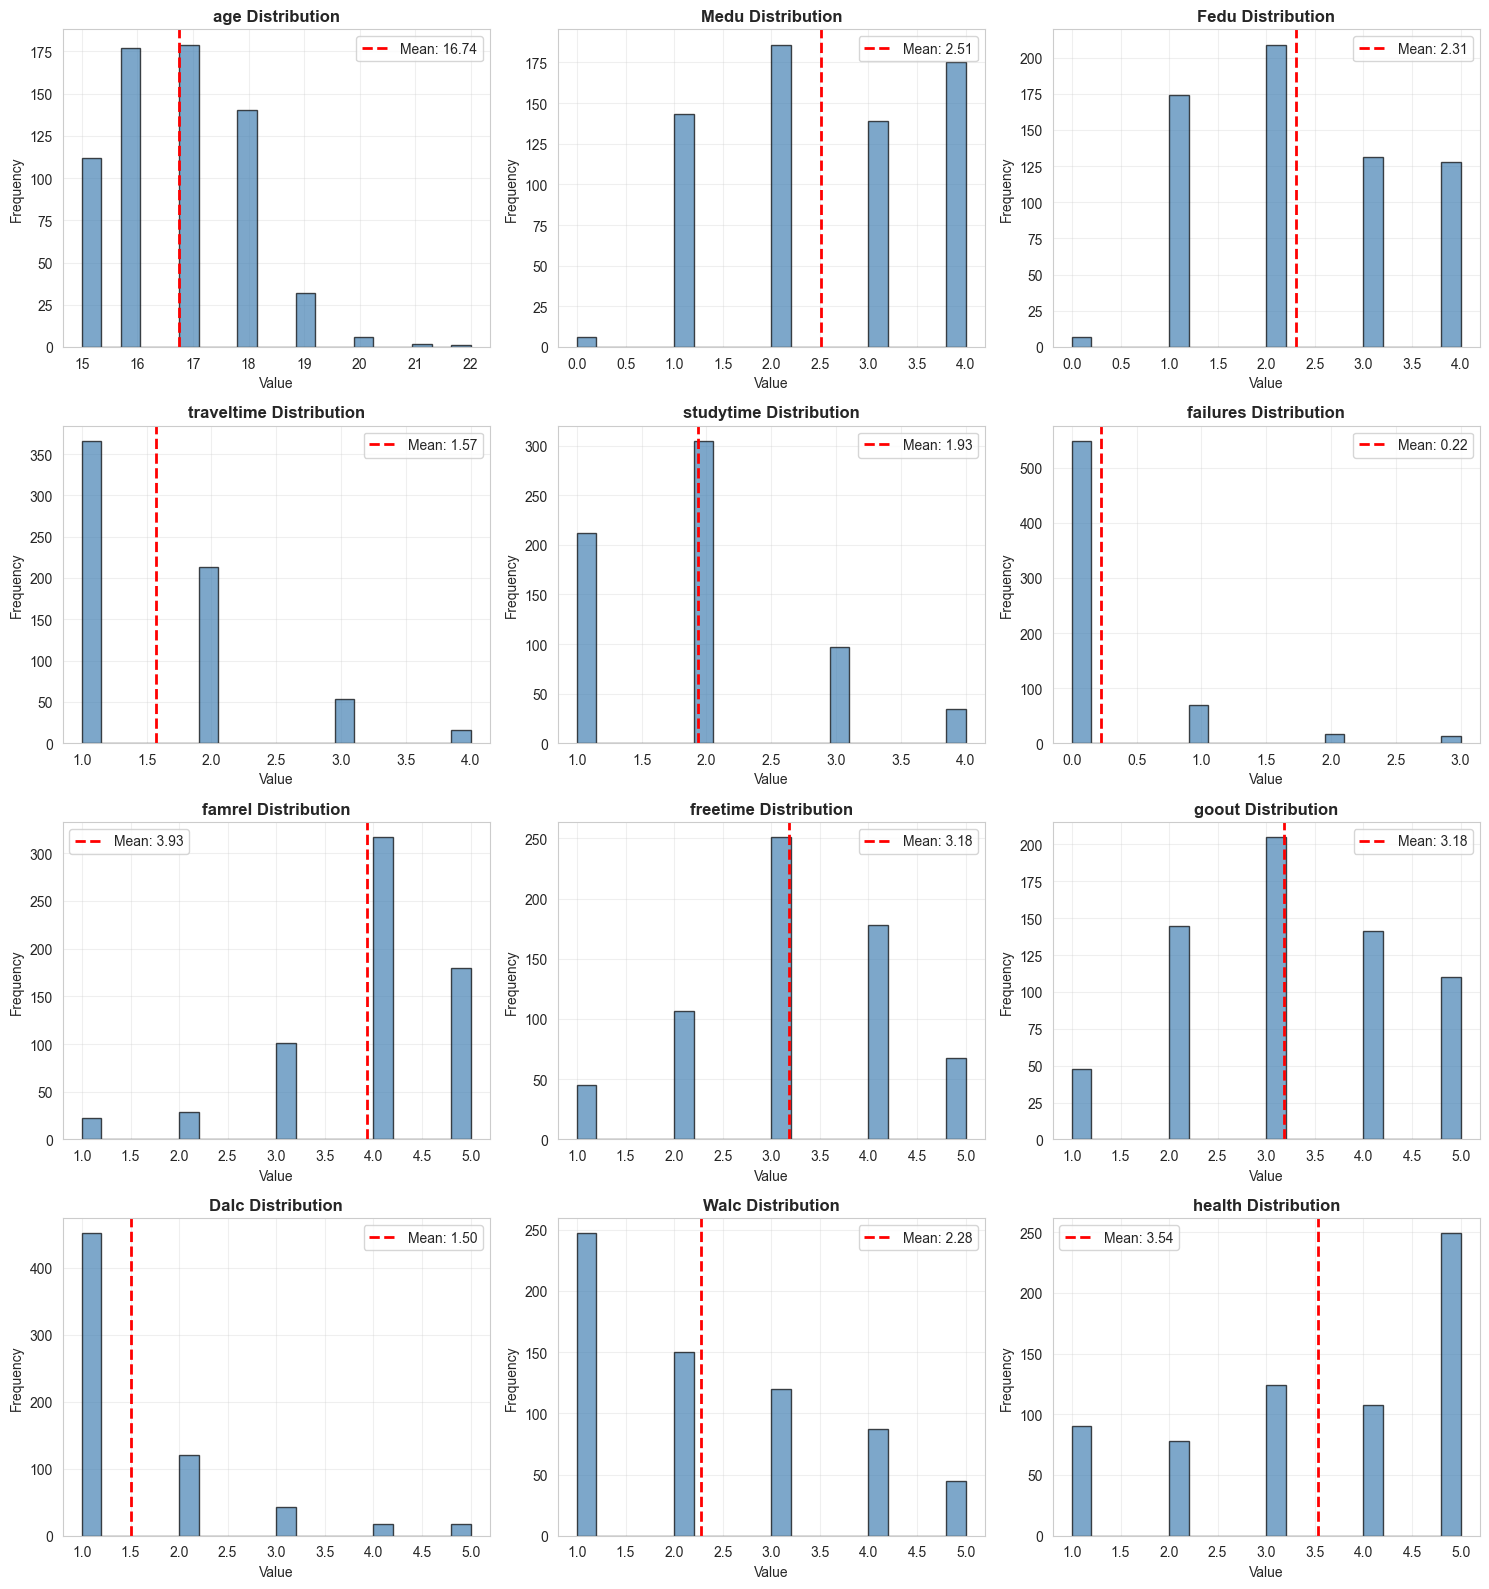

In [14]:
# Identify numerical columns
numerical_cols = features.select_dtypes(include=[np.number]).columns.tolist()

print(f'Numerical Columns ({len(numerical_cols)}): {numerical_cols}')

# Plot distribution of numerical variables
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:12]):
    axes[idx].hist(features[col], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(features[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {features[col].mean():.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Impact of Key Features on Final Grade (G3)

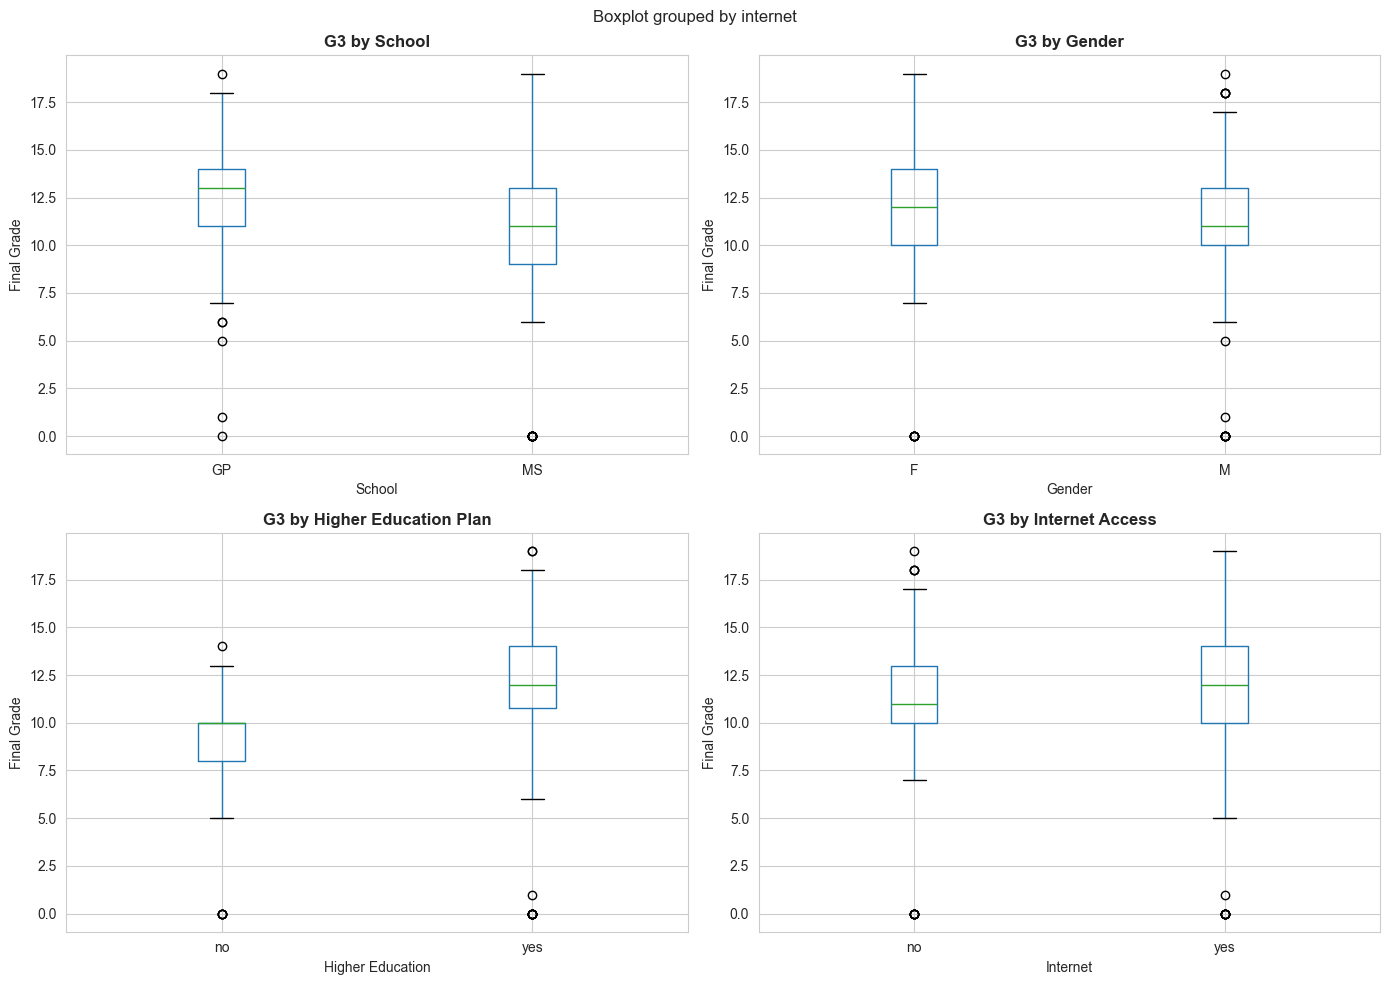

In [15]:
# Add target to features for analysis
analysis_data = features.copy()
analysis_data['G3'] = targets['G3']

# Analyze impact of key categorical features on G3
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# School
analysis_data.boxplot(column='G3', by='school', ax=axes[0, 0])
axes[0, 0].set_title('G3 by School', fontweight='bold')
axes[0, 0].set_xlabel('School')
axes[0, 0].set_ylabel('Final Grade')

# Sex
analysis_data.boxplot(column='G3', by='sex', ax=axes[0, 1])
axes[0, 1].set_title('G3 by Gender', fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Final Grade')

# Higher education
analysis_data.boxplot(column='G3', by='higher', ax=axes[1, 0])
axes[1, 0].set_title('G3 by Higher Education Plan', fontweight='bold')
axes[1, 0].set_xlabel('Higher Education')
axes[1, 0].set_ylabel('Final Grade')

# Internet
analysis_data.boxplot(column='G3', by='internet', ax=axes[1, 1])
axes[1, 1].set_title('G3 by Internet Access', fontweight='bold')
axes[1, 1].set_xlabel('Internet')
axes[1, 1].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()

## 12. Summary Statistics & Insights

In [16]:
print("="*60)
print("DATASET SUMMARY & KEY INSIGHTS")
print("="*60)

print(f"\nTotal Samples: {len(data)}")
print(f"Total Features: {len(features.columns)}")
print(f"Total Targets: {len(targets.columns)}")

print(f"\nTarget Variable (G3 - Final Grade):")
print(f"  - Mean: {targets['G3'].mean():.2f}")
print(f"  - Median: {targets['G3'].median():.2f}")
print(f"  - Std Dev: {targets['G3'].std():.2f}")
print(f"  - Min: {targets['G3'].min()}")
print(f"  - Max: {targets['G3'].max()}")
print(f"  - Range: {targets['G3'].max() - targets['G3'].min()}")

print(f"\nMissing Values: {data.isnull().sum().sum()} (Dataset is Complete!)")

print(f"\nGrade Progression Correlation:")
print(f"  - G1 ↔ G2: {targets['G1'].corr(targets['G2']):.3f}")
print(f"  - G1 ↔ G3: {targets['G1'].corr(targets['G3']):.3f}")
print(f"  - G2 ↔ G3: {targets['G2'].corr(targets['G3']):.3f}")

print(f"\nCategorical Variables: {len(categorical_cols)}")
print(f"Numerical Variables: {len(numerical_cols)}")

print("\n" + "="*60)
print("EDA COMPLETE!")
print("="*60)

DATASET SUMMARY & KEY INSIGHTS

Total Samples: 649
Total Features: 30
Total Targets: 3

Target Variable (G3 - Final Grade):
  - Mean: 11.91
  - Median: 12.00
  - Std Dev: 3.23
  - Min: 0
  - Max: 19
  - Range: 19

Missing Values: 0 (Dataset is Complete!)

Grade Progression Correlation:
  - G1 ↔ G2: 0.865
  - G1 ↔ G3: 0.826
  - G2 ↔ G3: 0.919

Categorical Variables: 17
Numerical Variables: 13

EDA COMPLETE!
